In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('white')

In [9]:
df = pd.read_csv('Tetrahymena_Data/TH Cleaned 240920', index_col= 'Unnamed: 0')

In [10]:
df.head()

,Dependent,nN,nX,ATS0m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,...,VR3_D,TopoPSA,SRW9,MW,AMW,WTPT-3,WTPT-4,WPATH,WPOL,XLogP
0,-0.16,0,4,5171.074121,7540.215000,0.000000,0.000000,0.0,0.0,0.0,...,7.600902,0.00,0.0,151.875411,30.375082,9.000000,0.000000,16,0,2.864
1,1.64,1,1,7239.077516,1949.851947,2621.276160,0.000000,0.0,0.0,0.0,...,1.257878,43.14,0.0,138.926890,19.846699,9.806844,4.626105,18,2,0.927
2,-2.72,0,0,404.296378,63.536256,3.048192,0.000000,0.0,0.0,0.0,...,0.069315,20.23,0.0,32.026215,5.337702,2.000000,2.000000,1,0,-0.499
3,-0.87,2,0,796.688476,478.062438,281.606409,34.286112,0.0,0.0,0.0,...,0.853778,55.12,0.0,60.032363,7.504045,7.181981,2.310660,10,1,-1.524
4,-1.32,2,0,1568.564075,1144.785369,185.742144,4.064256,0.0,0.0,0.0,...,5.965649,84.13,0.0,76.009519,9.501190,6.732051,0.000000,9,0,-0.801


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
X = df.drop('Dependent', axis = 1)
y = df['Dependent']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [25]:
from sklearn.ensemble import RandomForestRegressor

## Default RF Parameters

In [15]:
rf = RandomForestRegressor()

In [16]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
pred_default = rf.predict(X_test)

In [23]:
print('Default RF:', '\n')
print('MAE: ', mean_absolute_error(y_test, pred_default))
print('MSE: ', mean_squared_error(y_test, pred_default))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred_default)))
print('r2: ', r2_score(y_test, pred_default))

Default RF: 

MAE:  0.3780382939491586
MSE:  0.28270459381273155
RMSE:  0.5316997214713691
r2:  0.7317882710426105


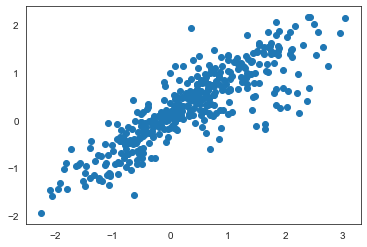

In [24]:
plt.scatter(y_test, pred_default)

## max_depth

In [26]:
rf = RandomForestRegressor(max_depth = 1)

In [27]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=1, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [28]:
pred_md1 = rf.predict(X_test)

In [51]:
print('max_depth = 1:', '\n')
print('MAE: ', mean_absolute_error(y_test, pred_md1))
print('MSE: ', mean_squared_error(y_test, pred_md1))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred_md1)))
print('r2: ', r2_score(y_test, pred_md1))

max_depth = 1: 

MAE:  0.6296107854825672
MSE:  0.6582099283737941
RMSE:  0.8113013794970363
r2:  0.37553323585891996


Text(0.5, 1.0, 'max_depth = 1')

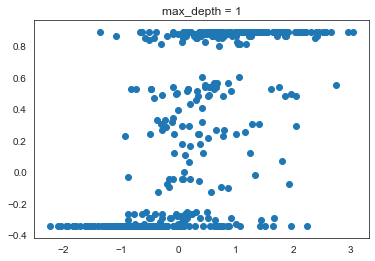

In [50]:
plt.scatter(y_test, pred_md1)
plt.title('max_depth = 1')

In [31]:
rf = RandomForestRegressor(max_depth=2)
rf.fit(X_train, y_train)
pred_md2 = rf.predict(X_test)

In [49]:
print('max_depth = 2:', '\n')
print('MAE: ', mean_absolute_error(y_test, pred_md2))
print('MSE: ', mean_squared_error(y_test, pred_md2))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred_md2)))
print('r2: ', r2_score(y_test, pred_md2))

max_depth = 2: 

MAE:  0.5598681778198112
MSE:  0.5511159966939798
RMSE:  0.7423718722405772
r2:  0.47713699188318437


Text(0.5, 1.0, 'max_depth = 2')

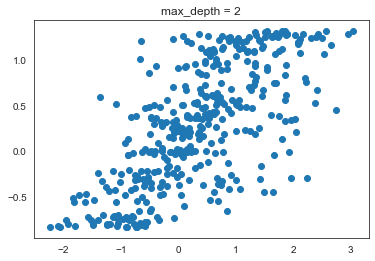

In [48]:
plt.scatter(y_test, pred_md2)
plt.title('max_depth = 2')

In [34]:
rf = RandomForestRegressor(max_depth=3)
rf.fit(X_train, y_train)
pred_md3 = rf.predict(X_test)

In [47]:
print('max_depth = 3:', '\n')
print('MAE: ', mean_absolute_error(y_test, pred_md3))
print('MSE: ', mean_squared_error(y_test, pred_md3))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred_md3)))
print('r2: ', r2_score(y_test, pred_md3))

max_depth = 3: 

MAE:  0.5197541912334216
MSE:  0.47748954801634846
RMSE:  0.6910061852229316
r2:  0.5469889770613987


Text(0.5, 1.0, 'max_depth = 3')

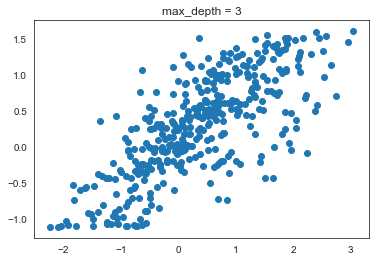

In [46]:
plt.scatter(y_test, pred_md3)
plt.title('max_depth = 3')

In [37]:
rf = RandomForestRegressor(max_depth=4)
rf.fit(X_train, y_train)
pred_md4 = rf.predict(X_test)

In [45]:
print('max_depth = 4:', '\n')
print('MAE: ', mean_absolute_error(y_test, pred_md4))
print('MSE: ', mean_squared_error(y_test, pred_md4))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred_md4)))
print('r2: ', r2_score(y_test, pred_md4))

max_depth = 4: 

MAE:  0.49095637463616304
MSE:  0.42947235272099005
RMSE:  0.6553414016533596
r2:  0.5925445684869269


Text(0.5, 1.0, 'max_depth = 4')

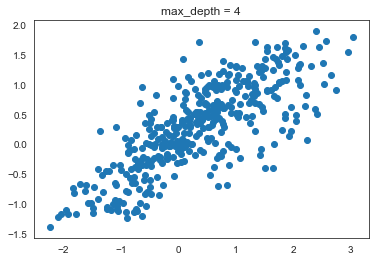

In [43]:
plt.scatter(y_test, pred_md4)
plt.title('max_depth = 4')

In [40]:
rf = RandomForestRegressor(max_depth=5)
rf.fit(X_train, y_train)
pred_md5 = rf.predict(X_test)

In [41]:
print('max_depth = 5:', '\n')
print('MAE: ', mean_absolute_error(y_test, pred_md5))
print('MSE: ', mean_squared_error(y_test, pred_md5))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred_md5)))
print('r2: ', r2_score(y_test, pred_md5))

max_depth = 5: 

MAE:  0.45698135533910866
MSE:  0.3791680420902881
RMSE:  0.6157662235705106
r2:  0.6402700261680555


Text(0.5, 1.0, 'max_depth = 5')

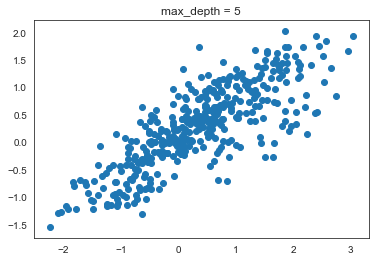

In [42]:
plt.scatter(y_test, pred_md5)
plt.title('max_depth = 5')

In [52]:
max_depth = []
r2 = []

for i in range(1,50):
    
    max_depth.append(i)
    
    rf = RandomForestRegressor(max_depth = i)
    rf.fit(X_train, y_train)
    pred_i = rf.predict(X_test)
    
    r2.append(r2_score(y_test, pred_i))

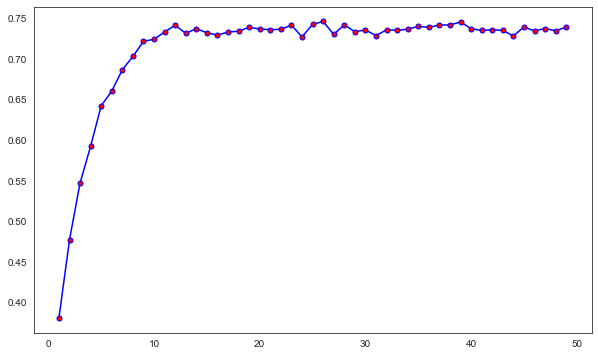

In [60]:
plt.figure(figsize=(10,6))
plt.plot(max_depth,r2,color='blue',linestyle='-',marker='o',markerfacecolor='red',markersize=5)

In [68]:
print('Optimal r2', '\n')
print('r2: ', max(r2))
print('max_depth: ', r2.index(max(r2))+1)

Optimal r2 

r2:  0.7462145246390866
max_depth:  26


## min_samples_split

In [78]:
min_samples_split = [2,5,10,15,50,100]
r2_mss = []

for i in min_samples_split:
       
    rf = RandomForestRegressor(min_samples_split = i)
    rf.fit(X_train, y_train)
    pred_i = rf.predict(X_test)
    
    r2_mss.append(r2_score(y_test, pred_i))

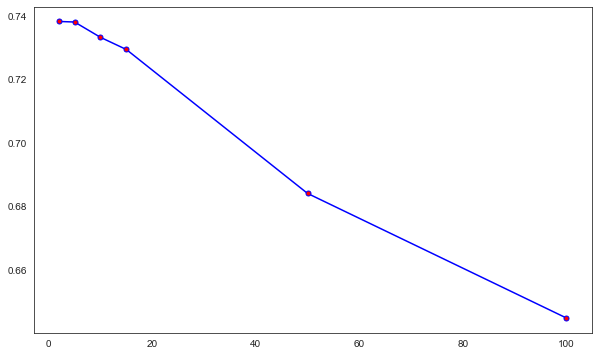

In [79]:
plt.figure(figsize=(10,6))
plt.plot(min_samples_split,r2_mss,color='blue',linestyle='-',marker='o',markerfacecolor='red',markersize=5)

## max_leaf_nodes

In [87]:
max_leaf_nodes = []
r2_mln = []

for i in list(range(2,200,10)):
    
    max_leaf_nodes.append(i)
    
    rf = RandomForestRegressor(max_leaf_nodes = i)
    rf.fit(X_train, y_train)
    pred_i = rf.predict(X_test)
    
    r2_mln.append(r2_score(y_test, pred_i))

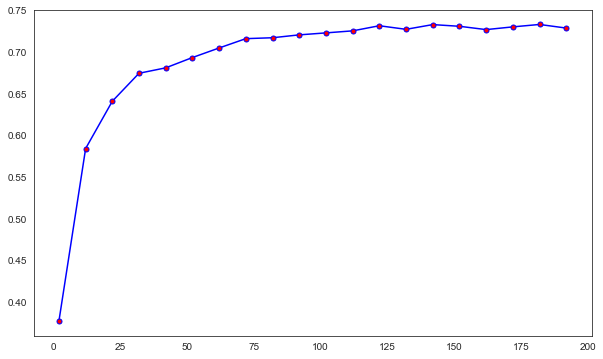

In [89]:
plt.figure(figsize=(10,6))
plt.plot(max_leaf_nodes,r2_mln,color='blue',linestyle='-',marker='o',markerfacecolor='red',markersize=5)

In [93]:
print('Optimal r2', '\n')
print('r2: ', max(r2_mln))
print('max_leaf_nodes: ', max_leaf_nodes[r2_mln.index(max(r2_mln))])

Optimal r2 

r2:  0.732882584613358
max_leaf_nodes:  182


## min_samples_leaf

In [96]:
min_samples_leaf = []
r2_msl = []

for i in list(range(1,2000,100)):
    
    min_samples_leaf.append(i)
    
    rf = RandomForestRegressor(min_samples_leaf = i)
    rf.fit(X_train, y_train)
    pred_i = rf.predict(X_test)
    
    r2_msl.append(r2_score(y_test, pred_i))

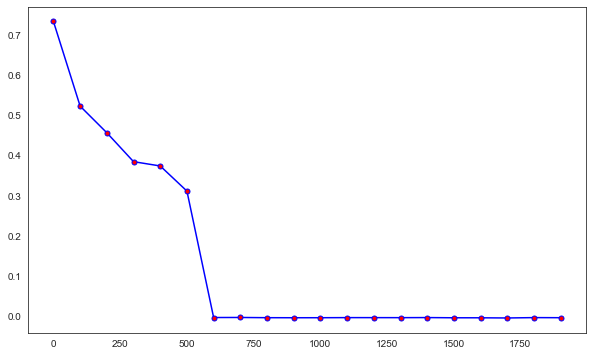

In [97]:
plt.figure(figsize=(10,6))
plt.plot(min_samples_leaf,r2_msl,color='blue',linestyle='-',marker='o',markerfacecolor='red',markersize=5)

## n_estimators

In [98]:
n_estimators = []
r2_ne = []

for i in list(range(10,1000,10)):
    
    n_estimators.append(i)
    
    rf = RandomForestRegressor(n_estimators = i)
    rf.fit(X_train, y_train)
    pred_i = rf.predict(X_test)
    
    r2_ne.append(r2_score(y_test, pred_i))

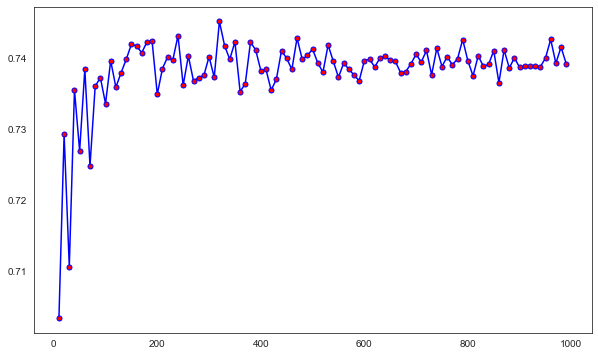

In [99]:
plt.figure(figsize=(10,6))
plt.plot(n_estimators,r2_ne,color='blue',linestyle='-',marker='o',markerfacecolor='red',markersize=5)

In [102]:
print('Optimal r2', '\n')
print('r2: ', max(r2_ne))
print('n_estimators: ', n_estimators[r2_ne.index(max(r2_ne))])

Optimal r2 

r2:  0.7450555490546293
n_estimators:  320


## max_samples

In [106]:
max_samples = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]
r2_ms = []

for i in max_samples:
    
    rf = RandomForestRegressor(max_samples = i)
    rf.fit(X_train, y_train)
    pred_i = rf.predict(X_test)
    
    r2_ms.append(r2_score(y_test, pred_i))

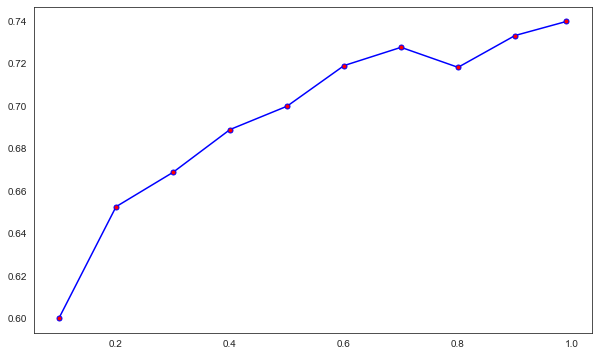

In [107]:
plt.figure(figsize=(10,6))
plt.plot(max_samples,r2_ms,color='blue',linestyle='-',marker='o',markerfacecolor='red',markersize=5)